<h1 style="color: #001a79;">Lady Tasting Tea Problem:</h1>
<h2 style="color: #001a79;">Exercise 1.1</h2>

<hr style="border-top: 1px solid #001a79;" />

<h4> Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups<br>
    is less than or equal to 1%. <h4>

<b>Pre-Exercise:<b>

In [1]:
# Math module
import math

The following was adapted from https://stackoverflow.com/a/4941932.

In [2]:
# Original Problem:
# Number of ways of selecting 4 cups from 8 (i.e: 8 choose 4)
num_combinations = math.comb(8, 4)
num_combinations

70

In [3]:
# Probability of randomly selecting 4 correct cups when we dont take 
# order into consideration
probability = 1.0 / num_combinations
round(probability, 5)

0.01429


<br>

<b>Main Exercise:<b>

As shown above, when the experiment is conducted with 8 cups total (4 with milk first and 4 with tea first) there is roughly 1.4% chance of randomly<br>
selecting the 8 cups correctly. In the interest lowering this probablity to 1% lets adds 1 more cup into the mix.

In [4]:
# Number of ways of selecting 4 cups from 9
num_combinations = math.comb(9, 4)

# Probability of randomly selecting correct cups is:
probability = 1.0 / num_combinations

print("Number of combinations:  {}".format(num_combinations))
print("Probability: {}".format(round(probability, 5)))

Number of combinations:  126
Probability: 0.00794



<br>

Now we see the probability at roughly 0.79%. The reduced probability can be attributed to the higher number of combinations available for selection<br>
in the experiment, going from 70 (8 total cups) to 126 (9 total cups).

In [5]:
# Number of ways of selecting 4 cups from 10
num_combinations = math.comb(10, 4)

# Probability of randomly selecting correct cups is:
probability = 1.0 / num_combinations

print("Number of combinations:  {}".format(num_combinations))
print("Probability: {}".format(round(probability, 5)))

Number of combinations:  210
Probability: 0.00476



<br>

**Answer:**<br>
From the results above we can conclude that a total of 10 cups deviates the probability of selecting the correct cups further away from 1% target.<br>
An experiment with a total of 9 cups best alligns the probabilty of randomly selecting the correct cups based on the exercise criteria.

  
 <br> 
 
 <b> 1.1 Bonus Question : How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold? <b>  
*** 

Lets explore the discrete distribution when selecting 4 cups from 8.


In [6]:
import random            # random selection module    
import seaborn as sns    # plotting module
import itertools         # module that can generate combinations

In [7]:
cup_list = list(range(8))
cup_list

[0, 1, 2, 3, 4, 5, 6, 7]

In [8]:
comb_list = list(itertools.combinations(cup_list, 4))
print("Number of combinations in list: {}".format(len(comb_list)))


# Pick a random selection from the list of 70 to simulate the experiment.
# Store selection as a set: this datastructure doesnt care about order.... reference 
        # used when you dont care about order (i.e: 0 1 2 3   =  3 2 1 0)
        # dont have order or keep count
        # have unique values 
        
selection = set(random.choice(comb_list))
print("Selection Combination:  {}".format(selection))

Number of combinations in list: 70
Selection Combination:  {0, 3, 5, 6}


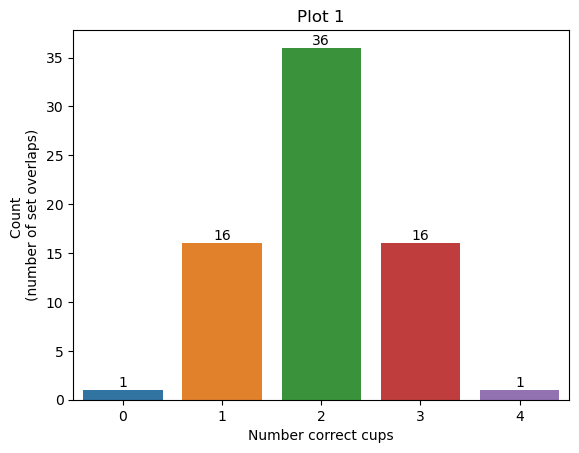

In [9]:
# iterate all possible 70 combinations 
# get intersection between 4 correct cups (selection) and all combinations
    # leverage set datastructure so that an overlap does not care about order.. e.g {1,2,3,4} = {4,2,3,1}

counts = [len(selection & set(i)) for i in itertools.combinations(cup_list, 4)]

# plot with labels
ax = sns.countplot(x=counts)
ax.set(xlabel='Number correct cups', ylabel='Count \n(number of set overlaps)')
ax.set(title='Plot 1')
ax.bar_label(ax.containers[0]);

When looking at plot 1 it becomes more obvious how to deal with the bonus question. When allowing one in-correct cup selection one must sum the<br>
count at 3 correct and 4 correct cups to account for both scenarios. This total of 17 is then divided by 70 (total number of combinations) to yield a <br>
probability of roughly 0.24 (24%). When accepting the null hyphotheis for this problem, i.e: the results are due to random chance, allowing one wrong<br>
cup selection has alomost a 1 in 4 chance of sucessfully guessing the correct selection.<br>

Back to the problem, lets alter the experiment by increasing the total number of cups of tea while tracking the count overlap to allow for one in-correct<br>
selection. The number of cups of type A (milk in first) will remain at 4 and the number of cups of type B (tea in first) will equal the total number of cups<br>
minus number of type A cups. In other words lets keep type A constant and increase the total number of cups.

In [10]:
dictFotPlot = {
   'total_num_cups' : [],
   'probability' : [],
}

# iterate from 8 to a larger value of total num of cups
for total_num_cups in range(8, 25):

    # declare number of cup type A (e.g milk in first)
    num_cup_type_a = 4
    
    cup_list = list(range(total_num_cups))
    comb_list = list(itertools.combinations(cup_list, 4))

    selection = set(random.choice(comb_list))
    counts_all = [len(selection & set(i)) for i in itertools.combinations(cup_list, 4)]

    # allowing for 1 wrong cup selection
        # overlap = sum of counts from position 3 and 4 of plot 1
    overlap = counts_all.count(4) + counts_all.count(3)
    
    # calculate probabilities
    probability = overlap / len(comb_list)
    
    # append probability and total cup data to dict
    dictFotPlot['total_num_cups'].append(total_num_cups)
    dictFotPlot['probability'].append(probability)

In [11]:
# iterate the idx position and val of probability array of dictFotPlot dict
for idx, prob in enumerate(dictFotPlot['probability']):
    if prob <= 0.01:
        # store the total_num_cups associated with the probability
        answer = dictFotPlot['total_num_cups'][idx]
        # stop iterating when val meets criteria
        break  
        
print("A probablity of 1% of maintained when the total number of cups = {}".format(answer))

A probablity of 1% of maintained when the total number of cups = 22


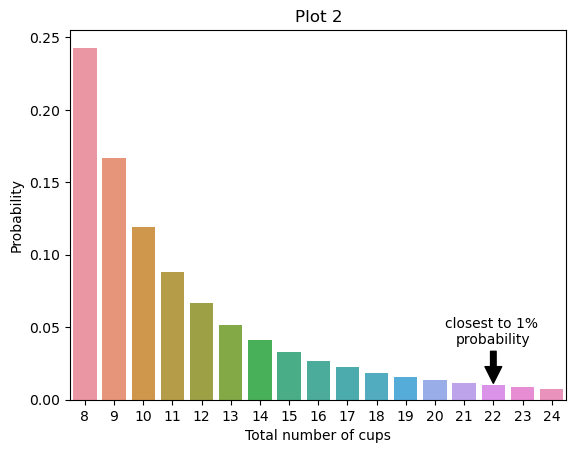

In [12]:
# plot data
ax = sns.barplot(data=dictFotPlot, x='total_num_cups', y='probability')
ax.set(xlabel='Total number of cups', ylabel='Probability')
ax.set(title='Plot 2')

# plot label code adapted from https://stackoverflow.com/a/47718154
# iterate idx and vals of x axis labels
for i, text in enumerate(ax.get_xticklabels()):
    # if text equals total number of cups assocated with <1% prob
    if text.get_text() == str(answer):   
        # apply label
        ax.annotate("closest to 1% \nprobability",(i, ax.patches[i].get_height()), 
                    xytext=(0,30), textcoords='offset points', ha="center",
                    arrowprops=dict(facecolor='black', shrink=0.05))

<h2 style="color: #001a79;">Exercise 1.2</h2>

<hr style="border-top: 1px solid #001a79;" />


Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" style="color: #ff791e">scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.


### Fisher's Problem Statement:
A lady declares that by tasting a cup of tea made with milk she can discriminate whether the milk or the tea infusion was first added to the cup: We will consider<br>
the problem of designing an experiment by means of which this assertion can be tested. For this purpose let us first lay down a simple form of experiment with<br>
a view to studying its limitations and its characteristics, both those which appear to be essential to the experimental method, when well developed, and those<br>
which are not essential but auxiliary.

Our experiment consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order.<br>
The subject has been told in advance of what the test will consist, namely that she will be asked to taste eight cups, that these shall be four of each kind, and <br>
that they shall be presented to her in a random order, that is in an order not determined arbitrarily by human choice, but by the actual manipulation of the <br>
physical apparatus used in games of chance, cards, dice, roulettes, etc., or, more expeditiously, from a published collection of random sampling numbers<br>
purporting to give the actual results of such manipulation. Her task is to divide the 8 cups into two sets of 4, agreeing, if possible, with the treatments received.

### Documentation:

Function: *scipy.stats.fisher_exact(table, alternative='two-sided')*<br>

**Passed arguments:**
- 2x2 Contingency Table (non-negative integers): allows you to summarize categorical data.
- alternative = 'two-sided', 'greater' or 'less'. This will be explored later...
         
    <br>

Lets explore the functions return values (odds ratio and p-value) followed by the alternative parameter:
- **Odds ratio:** <br>
Measures how many times more positive cases occur relative to negative cases [2]. In relation to the Tea Tasting Problem it measures how many times<br>
the lady selects the correct cup type relative to the in-correct cup type, with a value of 1 showing no difference and a positive value showing more<br>
correct selections than in-correct (visa-versa for negative odds ratio).



- **p-value**:<br>
This probability value describes how likely an outcome is assuming the null hypothesis is true or in other words how likely a result is if you are confident<br>
that the results are not due to "lucky sampling". Lee (2019) adds to this by detailing how lower p-values (typically <0.05) describe rarer events and add to<br>
one's notion that the experimental results are statistically significant (not random), leading to a rejection of the null hypothesis. Following the rejection of<br>
the null hypothesis one can considered an alternative hypothesis and further investigate what they suspect to be true.
- **"alternative" arguement:**<br>
How this arguement is declared dictates how the p-value is calculated. To help explain this lets leverage scipy library to model the experiment as a hyper-<br>
geometric distrubiton (Plot 3 below). This is appropriate as the model's data is discrete, each selection has a binary result and selected tea samples are <br>
not replaced, to add to this Fishers Exact Test assumes that the input table is from a hypergeometric distirbution [3].<br> <br>
As described by the documentation, under the null hypothesis the two-sided p-values represent the probabilities that a random table would have a<br>
probability equal to or less than the probability of the input table. Plot 3 below shows the probability values of selecting 0 correct cups to 4correct cups.<br>
A two-sided p-value test on a scenario where all cups were selected correctly would return the sum of all probability values in both directions where p ≤ 0.0143<br>
(i.e: 0.0143 @x=0 + 0.0143 @x=4 = 0.0286). One can also perform one-pair tests on the same scenario where the "greater" alternative declaration would sum<br>
the probability from position 4 to the end of the tail distribution, however in this case position 4 is the tail end so the result would be 0.0143. The "less"<br>
declaration works the same as the "greater" but moves from right to left.


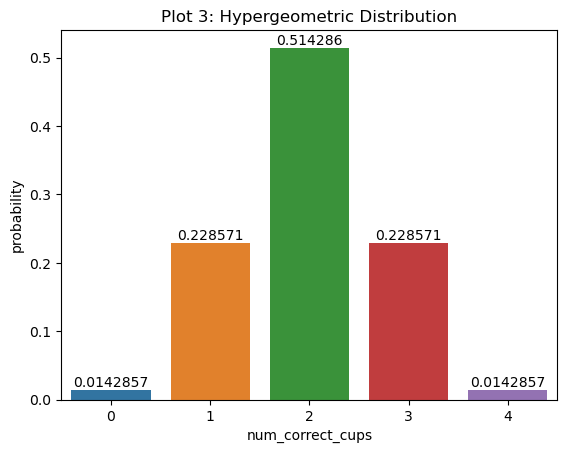

In [13]:
# code adapted from documentation (declared above)

# import module to model hypergeometric distrubtion
from scipy.stats import hypergeom
# import module to generate arrays
import numpy as np

# declare input variables
[numcups_total, numcups_type_a, num_selections] = [8, 4, 4]

# instansiate hypergeom object 
obj = hypergeom(numcups_total, numcups_type_a, num_selections)

# declare numpy array of required integer range and pass to prob mass function
x_range = np.arange(0, numcups_type_a + 1)
probabilities = obj.pmf(x_range)

# plot results
data = {"num_correct_cups" : x_range, "probability": probabilities}
ax = sns.barplot(data = data , x = 'num_correct_cups', y = 'probability')
ax.set(xlabel = list(data.keys())[0], ylabel = list(data.keys())[1])
ax.bar_label(ax.containers[0])
ax.set(title ='Plot 3: Hypergeometric Distribution');


<br>

### Experiment
**Null Hypothesis:** The Lady can't tell the difference between the two different tea types (milk in first & tea in first).<br>
**Alternative Hypothesis:** The Lady can tell the difference between the two different tea types. <br><br>
**Test Type:** As we are interested in p-values in one direction along the hypergeometric distribution.<br>
**Statistically significance:** p-value ≤ 0.05.

<br>
    
**Contingency Table:**
- Scenario 1: The lady select all cups correctly (8/8).<br>
- Scenario 2: The lady select 6 cups correctly (6/8).

In [14]:
%%html 
<style>
table {float:left}
</style>

**2x2 Contingency Table:**
| Scenario |  | milkLady | teaLady | Sum |
| :---: | :---: | :---: | :---: |:---: |
| S1  | milkActual | 4 | 0 | 4 |
| S1  | teaActual | 0 | 4 | 4 |
| S1  | Sum | 4 | 4 | 8 |
|     |  |   |   |   |
| S2 | milkActual | 3 | 1 | 4 |
| S2 | teaActual | 1 | 3 | 4 |
| S2 | Sum | 4 | 4 | 8 |


In [15]:
# manually calculate odds ratio's

# scenario 1, all cups correct
s1_table = np.array([[4, 0], [0, 4]])   
print("Scenario 1 odds ratio can't be calculated conventionally")

# scenario 2, 3 cups correct
s2_table = np.array([[3, 1], [1, 3]])

# calculate odds ratio for scenario 2
s2_odds_ratio = (s2_table[0][0] / s2_table[0][1]) / (s2_table[1][0] / s2_table[1][1]) 
print("Scenario 2 odds ratio = {}".format(s2_odds_ratio))

Scenario 1 odds ratio can't be calculated conventionally
Scenario 2 odds ratio = 9.0


In [16]:
# import module to perform fisher exact test
from scipy.stats import fisher_exact

# import module for reproducing plot 1 stats above but this time as probabilities
from scipy.stats import hypergeom

def fisher_test(table, test_type):
    '''calculates & prints odds ratio and p-value from passed 2x2 table and alternative 
    hypothesis parameter type'''
    
    table = np.array(table)             # convert table to numpy array
    numcups_total = table.sum()         # sum all table vals
    numcups_tea = table[0].sum()        # sum first row                           
    num_selections = table[:, 0].sum()  # sum second row
    
    odds_ratio, pvalue = fisher_exact(table, alternative = test_type)
    print("\nalternative type: {}\nOdds ratio = {},\np-value = {}"
          .format(test_type, odds_ratio, round(pvalue, 5)))

In [17]:
# Scenario 1: explore all test types...
alternative_options = ['two-sided', 'less', 'greater']
for test_type in alternative_options:
    fisher_test(s1_table, test_type)


alternative type: two-sided
Odds ratio = inf,
p-value = 0.02857

alternative type: less
Odds ratio = inf,
p-value = 1.0

alternative type: greater
Odds ratio = inf,
p-value = 0.01429


In [18]:
# Scenario 2:
fisher_test(s2_table, 'greater')


alternative type: greater
Odds ratio = 9.0,
p-value = 0.24286



<br>

### Discussion:
#### Scenario 1 (all cups correct)

Odds ratio value of infinity shows there is a high level of assocation or dependancy between the first sub-array (row1) one and second sub-array (two). This<br>
makes sense as there is 100% overlap with the lady's selection of tea type and the actual tea type. The infinite odds ratio justifies selecting the "greater" one-<br>
tailed test as positive odd ratio's describe scenario's where the lady guesses more correct than in-correct. As per calculation above the resulting p-value for<br>
this method = 0.01429 and therefore we can reject the null hypothesis as the p ≤ 0.05. This scenario provides good evidence Lady can tell the difference<br>
between the different tea types, with only a probability of 1.4% for event occurance.

#### Scenario 2 (3 cups correct)
The positive odds ratio of 9.0 justifies selecting the "greater" one-tailed test. As per calculation above the resulting p-value for this method = 0.24286 and<br>
therefore we fail to reject the null hypothesis as p > 0.05. This scenario leaves the question open that the Lady may not be able to tell the difference between<br>
the difference tea types. This scenario is not a good test as one would have a 24.3% chance of selecting 3 cups correctly.



<br>

<h3>References (Exercise 1.2):</h3>


[1]. Cansiz, S, 2020, Interpretation of Odds Ratio and Fisher’s Exact Test, towards data science, available at:
[Ref Link](https://towardsdatascience.com/interpretation-of-odds-ratio-and-fishers-exact-test-c6dde394d204) (Viewed 08 October 2022).

[2]. Lee, A, 2019, P-values Explained By Data Scientist, towards data science, available at:
[Ref Link](https://towardsdatascience.com/p-values-explained-by-data-scientist-f40a746cfc8) (Viewed 09 October 2022).

[3]. Röhrich, G, 2020,Intro to Fisher’s Exact and the Hypergeometric Distribution, towards data science, available at:
[Ref Link](https://towardsdatascience.com/fishers-exact-fb49432e55b5#9a77) (Viewed 09 October 2022).

<hr style="border-top: 1px solid #001a79;" />